# Mini-projet: calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

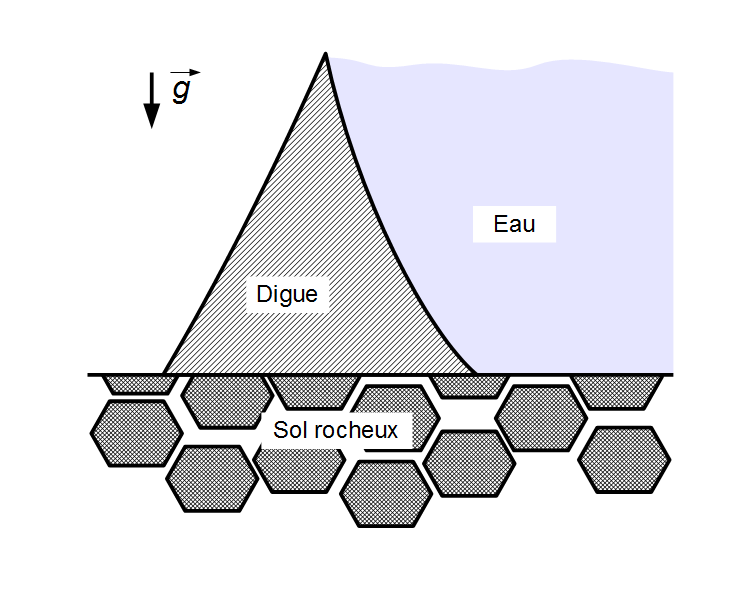

## Travail à la maison

La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retiens une masse d'eau de hauteur $H$, l'autre étant exposé à l'air. On prendra $H=10$ m dans toute la suite.

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

b. Rappelez l'expression de la pression hydrostatique dans l'eau en fonction de la hauteur par rapport au sol. Justifiez que l'on peut considérer la pression comme uniforme du coté air.

c. Rappelez la (les) équation(s) d'équilibre statique de la digue.

Pour considérer une digue de forme arbitraire, on modélisera les pentes coté air et coté eau par des fonctions mathématiques. Bien qu'il paraisse naturel de prendre une fonction qui définisse $y$ en fonction de $x$ (schéma ci-dessous à gauche), nous aurons rapidement besoin d'intégrer nos fonctions suivant la direction $y$, en particulier à cause de la pression hydrostatique. 

Il est donc plus judicieux de tourner la tête à 90° et de considérer deux fonctions donnant $x$ en fonction de $y$ (schéma ci-dessous à droite).

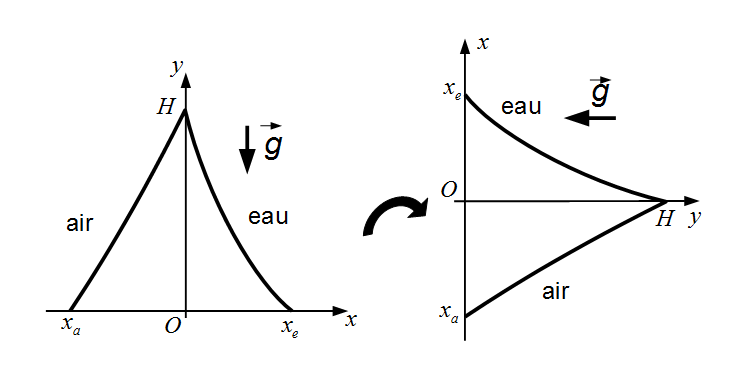


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe coté eau pour une digue représentée par une fonction affine :

$$
f_{eau}(y) = \frac{x_e}{H}.(H-y)
$$

d. Donnez l'expression de la fonction coté air dans le cas d'une fonction affine, et tracez la avec le code suivant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

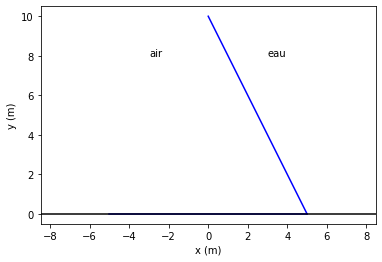

In [2]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xe=5
xa=-5

# on définit les fonctions coté eau et coté air, ici les courbes concaves
def feau(y):
    return (H-y)*xe/H

def fair(y):
    return  ## A remplir

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(feau(y),y,'-b')
#plt.plot(fair(y),y,'-b')  ## Décommenter après avoir codé la fonction fair(y)
plt.plot([xe,xa],[0,0],'-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3,8,'eau')
plt.text(-3,8,'air')
plt.xlim(-8,8)
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
#plt.axvline(0, color="black")
plt.show()

On rappelle que les forces de pressions s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

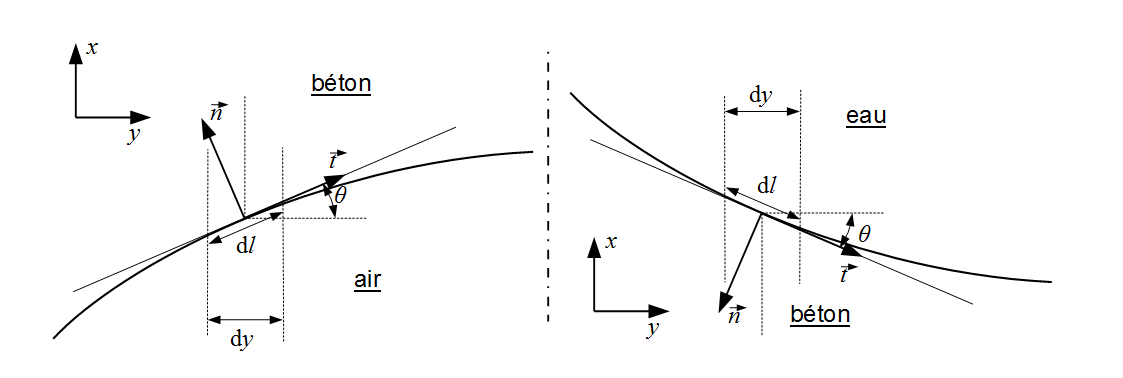

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :
$$
tan(\theta) = f'(y)
$$

e. Cette expression est-elle différente côté eau et côté air ? Quel est le signe de l'angle $\theta$ dans les deux cas ?

Le vecteur directeur $\vec t$ de la tangente est alors donné par :
$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

Le vecteur normal à cette tangente est alors donné par :

$$
\vec n = -\sin(\theta).\vec{u_y} + \cos(\theta).\vec{u_x} \qquad\mathrm{(coté\:air)}
$$

$$
\vec n = +\sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} \qquad\mathrm{(coté\:eau)}
$$

(on choisit le vecteur qui rentre dans le béton, l'expression est donc différente coté eau et coté air)

## Travail en séance

Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous somme en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour les deux interfaces fluide-béton :
$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(y,f(y))$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}y$. On montre facilement la relation avec l'angle $\theta$ définit avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

a. Pour le cas des fonctions affines, calculez la résultante (vectorielle ! il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression coté air et coté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. Comparez la résultante trouvée coté air avec celle que vous pouvez calculer analytiquement ($P_{air}.\sqrt{x_a^2+H^2}$).

b. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multiplié par la longueur $L=1$). En déduire le force de gravité exercée sur la digue.

c. En supposant que la digue est en équilibre statique, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue peut-elle être en équilibre ?

d. Toujours en considérant des fonctions affines, trouvez les bornes $x_a$, $x_e$ qui minimisent le volume de béton utilisé tout en gardant un rapport $T/N$ convenable pour l'équilibre statique. On pourra par exemple faire varier $x_e$ entre 0 et 5 et $x_a$ entre -5 et 0.

### Cas des digues concaves

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction concave de la forme :
$$
f_{eau} (y)=x_e-\ln\left(1+y\frac{(\exp(x_e)-1)}{H}\right) \qquad\mathrm{( coté\:eau )}
$$


$$
f_{air} (y)=x_a+\ln\left(1+y\frac{(\exp(-x_a)-1)}{H}\right) \qquad\mathrm{( coté\:air )}
$$

on donne également leurs dérivées :

$$
f'_{eau} (y)=-\frac{(\exp(x_e)-1)}{H+(\exp(x_e)-1).y}
$$


$$
f'_{air} (y)=\frac{(\exp(-x_a)-1)}{H+\exp(-x_a)-1).y}
$$



In [3]:
import numpy as np
import matplotlib.pyplot as plt

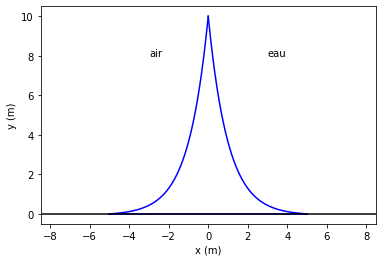

In [4]:
# ce code permet d'afficher les courbes représentant la digue

H=10
xe=5
xa=-5

# on définit les fonctions coté eau et coté air, ici les courbes concaves
def feau(y):
    return xe-np.log(1+y*(np.exp(xe)-1)/H)
def fair(y):
    return xa+np.log(1+y*(np.exp(-xa)-1)/H)

# on crée un tableau de y
y=np.linspace(0,H,1000)

# on trace
plt.plot(feau(y),y,'-b')
plt.plot(fair(y),y,'-b')
plt.plot([xe,xa],[0,0],'-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3,8,'eau')
plt.text(-3,8,'air')
plt.xlim(-8,8)
plt.axis('equal') # permet d'avoir un plot isométrique
plt.axhline(0, color="black")
#plt.axvline(0, color="black")
plt.show()

e. Calculez la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique.

f. Comme dans le cas linéaire, trouvez $x_a$, $x_e$ qui minimisent le volume de béton utilisé tout en gardant un rapport $T/N$ convenable pour l'équilibre statique.

g. Comparez avec le cas linéaire. Expliquez pourquoi la forme concave aide à réduire le volume.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression (coté air et coté eau) par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


